## Step 1: Load the dataset and prepare it

In [31]:
# Load necessary libraries
library(class)
library(caret)

# Read the dataset
abalone <- read.csv("abalone_dataset.csv")

# Add the age.group column based on the number of rings
dataset <- abalone
dataset$age.group <- cut(dataset$rings, breaks = c(0, 8, 11, 35), labels = c("young", "adult", "old"))

## Step 2: Split the dataset into training and testing sets

In [32]:
# Set seed for reproducibility
set.seed(123)

# Split the dataset into training (70%) and testing (30%) sets
train_index <- createDataPartition(dataset$age.group, p = 0.7, list = FALSE)
train_data <- dataset[train_index, ]
test_data <- dataset[-train_index, ]

## Step 3: Train and evaluate the first kNN model using a subset of features

In [33]:
# Define the first subset of features (e.g., length, diameter, height)
features_subset1 <- c("length", "diameter", "height")

# Prepare the training and testing data for the first model
train_features1 <- train_data[, features_subset1]
test_features1 <- test_data[, features_subset1]
train_labels <- train_data$age.group
test_labels <- test_data$age.group

# Train the first kNN model with k = 5
knn_model1 <- knn(train = train_features1, test = test_features1, cl = train_labels, k = 5)

# Evaluate the first model using a contingency table
confusion_matrix1 <- table(Predicted = knn_model1, Actual = test_labels)
print("Confusion Matrix for Model 1:")
print(confusion_matrix1)

# Calculate accuracy for the first model
accuracy1 <- sum(diag(confusion_matrix1)) / sum(confusion_matrix1)
print(paste("Accuracy for Model 1:", accuracy1))

[1] "Confusion Matrix for Model 1:"
         Actual
Predicted young adult old
    young   297   109  32
    adult   103   344 173
    old      22    90  82
[1] "Accuracy for Model 1: 0.577476038338658"


## Step 4: Train and evaluate the second kNN model using a different subset of features

In [35]:
# Define the second subset of features (e.g., whole_weight, shucked_weight, shell_weight)
features_subset2 <- c("whole_weight", "shucked_wieght", "shell_weight")

# Prepare the training and testing data for the second model
train_features2 <- train_data[, features_subset2]
test_features2 <- test_data[, features_subset2]

# Train the second kNN model with k = 5
knn_model2 <- knn(train = train_features2, test = test_features2, cl = train_labels, k = 5)

# Evaluate the second model using a contingency table
confusion_matrix2 <- table(Predicted = knn_model2, Actual = test_labels)
print("Confusion Matrix for Model 2:")
print(confusion_matrix2)

# Calculate accuracy for the second model
accuracy2 <- sum(diag(confusion_matrix2)) / sum(confusion_matrix2)
print(paste("Accuracy for Model 2:", accuracy2))

[1] "Confusion Matrix for Model 2:"
         Actual
Predicted young adult old
    young   307   106  17
    adult   102   358 126
    old      13    79 144
[1] "Accuracy for Model 2: 0.646166134185304"


## Step 5: Compare the two models and select the better-performing one

In [36]:
# Compare the accuracies of the two models
if (accuracy1 > accuracy2) {
  print("Model 1 performs better.")
  better_model <- "Model 1"
} else {
  print("Model 2 performs better.")
  better_model <- "Model 2"
}

[1] "Model 2 performs better."


## Step 6: Find the optimal value of k for the better-performing model

[1] "Optimal k value for the better-performing model: 10"


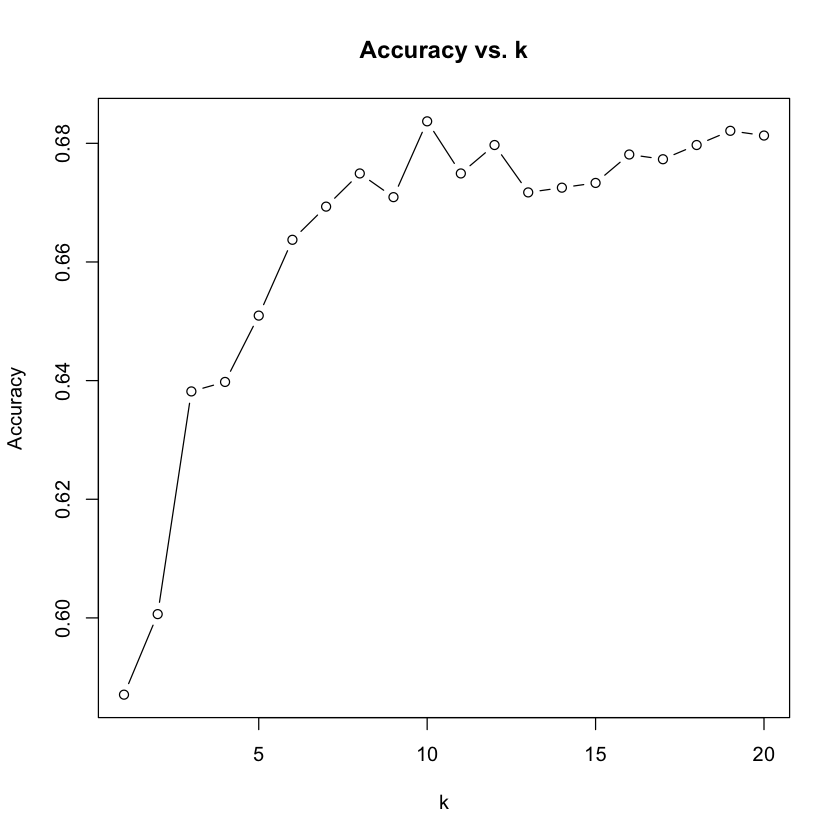

In [37]:
# Define a range of k values to test
k_values <- seq(1, 20, by = 1)

# Initialize a vector to store accuracies
accuracies <- numeric(length(k_values))

# Loop over the range of k values and calculate accuracy for each
for (i in 1:length(k_values)) {
  if (better_model == "Model 1") {
    knn_model <- knn(train = train_features1, test = test_features1, cl = train_labels, k = k_values[i])
  } else {
    knn_model <- knn(train = train_features2, test = test_features2, cl = train_labels, k = k_values[i])
  }
  confusion_matrix <- table(Predicted = knn_model, Actual = test_labels)
  accuracies[i] <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
}

# Find the optimal k value with the highest accuracy
optimal_k <- k_values[which.max(accuracies)]
print(paste("Optimal k value for the better-performing model:", optimal_k))

# Plot the accuracies for different k values
plot(k_values, accuracies, type = "b", xlab = "k", ylab = "Accuracy", main = "Accuracy vs. k")